<a href="https://colab.research.google.com/github/Evgeniy27Ishin/Colaboratory/blob/main/bukva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import scipy


I = np.array(([0.9, 0.1, 0.8]), ndmin=2).T
t = np.array(([0.2, 0.09, 0.5]), ndmin=2).T
W_i_h = np.array([[0.9, 0.3, 0.4], [0.2, 0.8, 0.2], [0.1, 0.5, 0.6]])
W_h_o = np.array([[0.3, 0.7, 0.5], [0.6, 0.5, 0.2], [0.8, 0.1, 0.9]])

for i in range(10000):
  O_h = W_i_h.dot(I)
  O_h = scipy.special.expit(O_h)
  O = W_h_o.dot(O_h)
  O = scipy.special.expit(O)

  E_o = t - O
  E_h = np.dot(W_h_o.T, E_o)
  W_h_o += 0.1 * E_o * O * (1 - O) * O_h.T
  W_i_h += 0.1 * E_h * O_h * (1 - O_h) * I.T

print(O)

[[0.2 ]
 [0.09]
 [0.5 ]]


In [193]:
import numpy as np
import scipy

class NeuralNetwork:
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes
    self.learning_rate = learning_rate

    np.random.seed(42)
    self.W_i_h = np.random.normal(0.01, 0.99, (self.hidden_nodes, self.input_nodes))
    self.W_h_o = np.random.normal(0.01, 0.99, (self.output_nodes, self.hidden_nodes))

    self.lr = learning_rate

    self.activation_function = lambda x: scipy.special.expit(x)

  def forward(self, inputs):
    inputs = np.array(inputs, ndmin=2).T
    O_h = self.W_i_h.dot(I)
    O_h = scipy.special.expit(O_h)
    O = self.W_h_o.dot(O_h)
    O = scipy.special.expit(O)
    return O

  def train (self, inputs_list, targets_list):
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list)
    hidden_inputs = np.dot(self.W_i_h, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.W_h_o, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)
    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.W_h_o.T, output_errors)
    self.W_h_o += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),np.transpose(hidden_outputs))
    self.W_i_h += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),np.transpose(inputs))

  def query(self, inputs_list):
    inputs = np.array(inputs_list, ndmin=2).T
    hidden_inputs = np.dot(self.W_i_h, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = np.dot(self.W_h_o, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)
    return final_outputs

s1 =  {'title': 'A', 'points': [0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1], 'targets': [[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]}
s2 =  {'title': 'Б', 'points': [1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0], 'targets': [[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]}
s5 =  {'title': 'Д', 'points': [0,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1], 'targets': [[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]}
s10 = {'title': 'И', 'points': [1,0,0,0,1,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,1], 'targets': [[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],]}
s12 = {'title': 'К', 'points': [1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0], 'targets': [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]}
s12 = {'title': 'К', 'points': [1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0], 'targets': [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]}
s20 = {'title': 'Т', 'points': [1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0], 'targets': [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],]}
s25 = {'title': 'Ч', 'points': [1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0], 'targets': [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0]]}

net = NeuralNetwork(30, 20, 33, 0.1)

for i in range(500):
  net.train(s1['points'], s1['targets'])
  net.train(s2['points'], s2['targets'])
  net.train(s5['points'], s5['targets'])
  net.train(s10['points'], s10['targets'])
  net.train(s12['points'], s12['targets'])
  net.train(s13['points'], s13['targets'])
  net.train(s20['points'], s20['targets'])
  net.train(s25['points'], s25['targets'])

In [192]:
alphabet = {1:'А', 2:'Б', 3:'В', 4:'Г', 5:'Д', 6:'Е', 7:'Ё', 8:'Ж', 9:'З', 10:'И', 11:'Й', 12:'К', 13:'Л', 14:'М', 15:'Н', 16:'О', 17:'П', 18:'Р', 19:'С', 20:'Т', 21:'У', 22:'Ф', 23:'Х', 24:'Ц', 25:'Ч', 26:'Ш', 27:'Щ', 28:'Ъ', 29:'Ы', 30:'Ь', 31:'Э', 32:'Ю', 33:'Я'}
res = net.query(s10['points'])
position = np.argmax(res)
sym = alphabet[position+1]
print(f'Это букв: {sym}')

Это букв: И


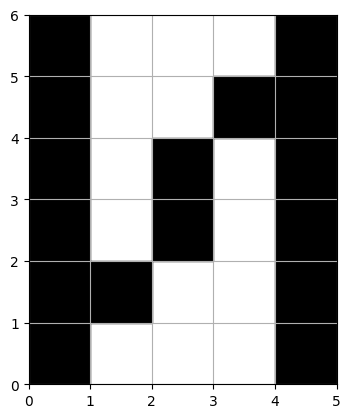

In [187]:
import matplotlib.pyplot as plt
import matplotlib.patches

class Symbol:
  def __init__(self, symbol):
    self.width = 5
    self.height = 6
    self.title = symbol['title']
    self.points = symbol['points']
    self.targets = symbol['targets']
    plt.xlim(0, self.width)
    plt.ylim(0, self.height)
    plt.grid()

    self.axes = plt.gca()
    self.axes.set_aspect("equal")

  def to_matrix(self):
    matrix = []
    x = self.points
    while x != []:
        matrix.append(x[:1])
        x = x[1:]

    return matrix

  def show(self):
    rect_width = 1.0
    rect_height = 1.0

    k = self.height-1
    for i in range(self.width+1):
      for j in range(self.height-1):
        if self.points[i*self.width + j] == 1:
          rect_coord = (j, k)
          rect = matplotlib.patches.Rectangle(rect_coord,rect_width,rect_height,color="black")
          self.axes.add_patch(rect)
      k -= 1
    plt.show()

s1 =  {'title': 'A', 'points': [0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1], 'targets': [[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]}
s2 =  {'title': 'Б', 'points': [1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0], 'targets': [[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]}
s5 =  {'title': 'Д', 'points': [0,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1], 'targets': [[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]}
s10 = {'title': 'И', 'points': [1,0,0,0,1,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,1], 'targets': [[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],]}
s12 = {'title': 'К', 'points': [1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0], 'targets': [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]}
s13 = {'title': 'Л', 'points': [1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1], 'targets': [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]}
s20 = {'title': 'Т', 'points': [1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0], 'targets': [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],]}
s25 = {'title': 'Ч', 'points': [1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0], 'targets': [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0]]}


symbol = Symbol(s10)
symbol.show()